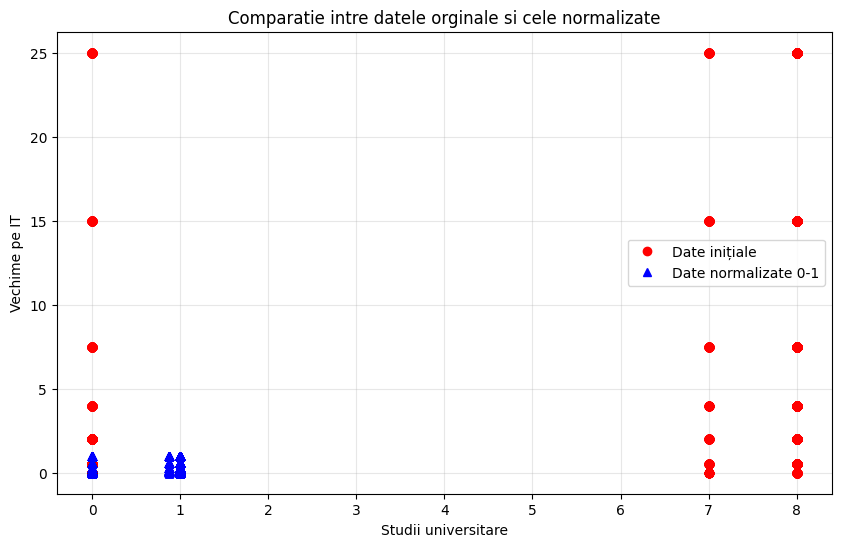

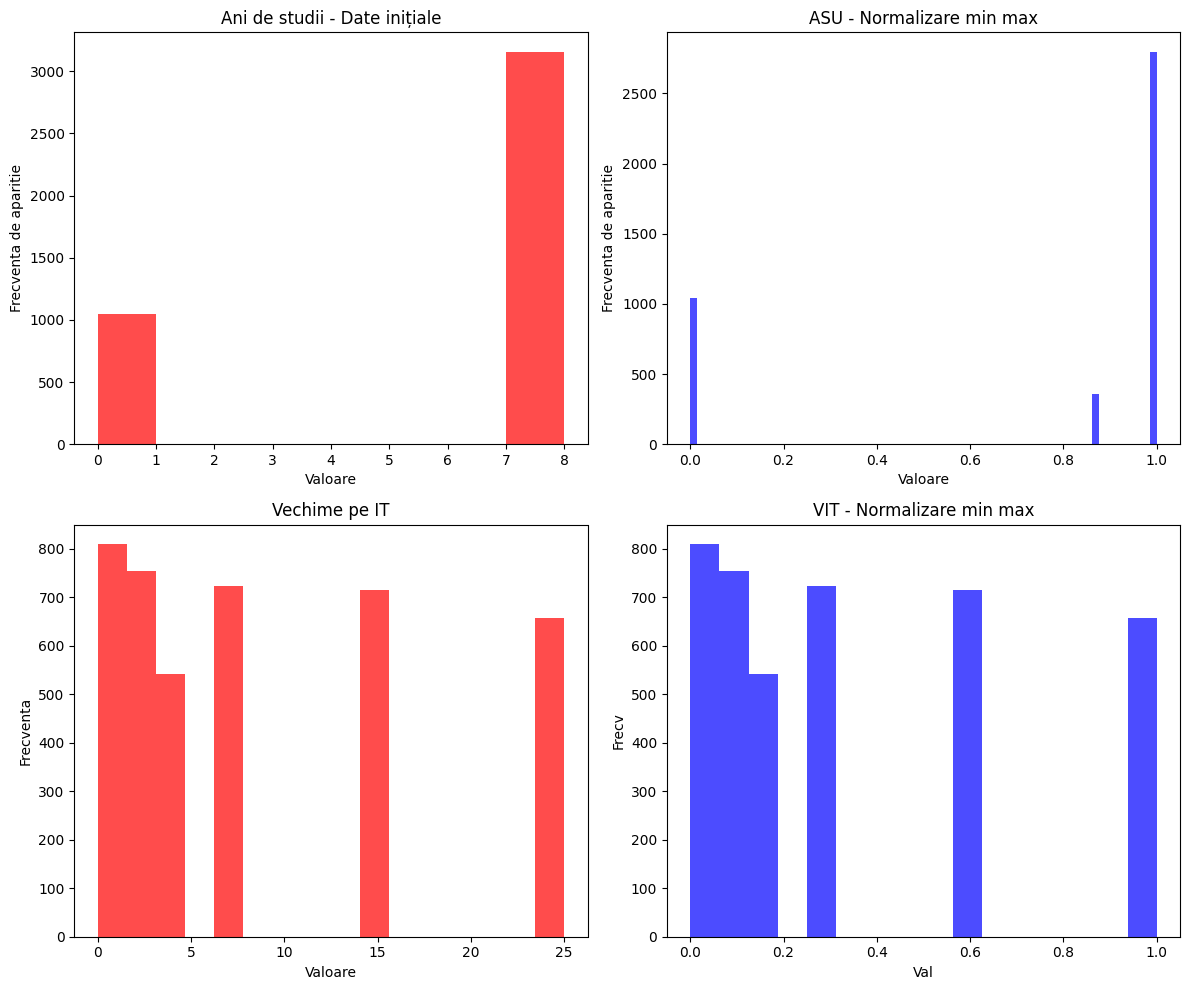

In [3]:
import csv
from matplotlib import pyplot as plt
import numpy as np

#incarcare date din fisier
def loaddata(f_path):
    data = []
    data_names = []
    with open(f_path, encoding="utf-8") as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for line_count, row in enumerate(csv_reader):
            if line_count == 0:
                continue
            elif line_count == 1:
                data_names = row
            else:
                data.append(row)

    return data_names, data

# extragem coloana
def extractfeature(alldata, names, featurename):
    pos = names.index(featurename)
    return [str(d[pos]) for d in alldata]

# normalizare min max 
def scale01(features):
    minim = np.min(features)
    maxim = np.max(features)
    scaled = [(feat - minim) / (maxim - minim) for feat in features]
    return scaled

filepath = "data/surveyDataSience.csv"
header, datafull = loaddata(filepath)

educatie = extractfeature(datafull, header, 
                        "What is the highest level of formal education that you have attained or plan to attain within the next 2 years?")
experience = extractfeature(datafull, header, 
                        "For how many years have you been writing code and/or programming?")
experience_mapping = {
    "< 1 years": 0.5,
    "1-3 years": 2,
    "3-5 years": 4,
    "5-10 years": 7.5,
    "10-20 years": 15,
    "20+ years": 25,
    "I have never written code": 0
}

education_to_years = {
    "No formal education past high school": 0,
    "Some college/university study without earning a bachelor's degree": 2,
    "Bachelor's degree": 3,
    "Master's degree": 5,
    "Professional doctorate": 7,
    "Doctoral degree": 8,
    "I prefer not to answer": 0
}
years_educatie = []
experienta_vechime = []
# verifcam ca au aceasi lungime datele
for i in range(len(educatie)):
    if i < len(experience): 
        val1 = education_to_years.get(educatie[i])
        val2 = experience_mapping.get(experience[i])
        if val1 is not None and val2 is not None:
            years_educatie.append(val1)
            experienta_vechime.append(val2)

# combinam cele 2 seturi de date intr unsingur diag
plt.figure(figsize=(10, 6))
plt.plot(years_educatie, experienta_vechime, 'ro', label='Date inițiale')
edu_scaled = scale01(years_educatie)
exp_scaled = scale01(experienta_vechime)
plt.plot(edu_scaled, exp_scaled, 'b^', label='Date normalizate 0-1')
plt.legend()
plt.xlabel('Studii universitare')
plt.ylabel('Vechime pe IT')
plt.title("Comparatie intre datele orginale si cele normalizate")
plt.grid(True, alpha=0.3)
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].hist(years_educatie, bins='auto', color='red', alpha=0.7)
axes[0, 0].set_title("Ani de studii - Date inițiale")
axes[0, 0].set_xlabel("Valoare")
axes[0, 0].set_ylabel("Frecventa de aparitie")

axes[0, 1].hist(edu_scaled, bins='auto', color='blue', alpha=0.7)
axes[0, 1].set_title("ASU - Normalizare min max")
axes[0, 1].set_xlabel("Valoare")
axes[0, 1].set_ylabel("Frecventa de aparitie") 

axes[1, 0].hist(experienta_vechime, bins='auto', color='red', alpha=0.7)
axes[1, 0].set_title("Vechime pe IT")
axes[1, 0].set_xlabel("Valoare")
axes[1, 0].set_ylabel("Frecventa")

axes[1, 1].hist(exp_scaled, bins='auto', color='blue', alpha=0.7)
axes[1, 1].set_title("VIT - Normalizare min max")
axes[1, 1].set_xlabel("Val")
axes[1, 1].set_ylabel("Frecv")

plt.tight_layout()
plt.show()

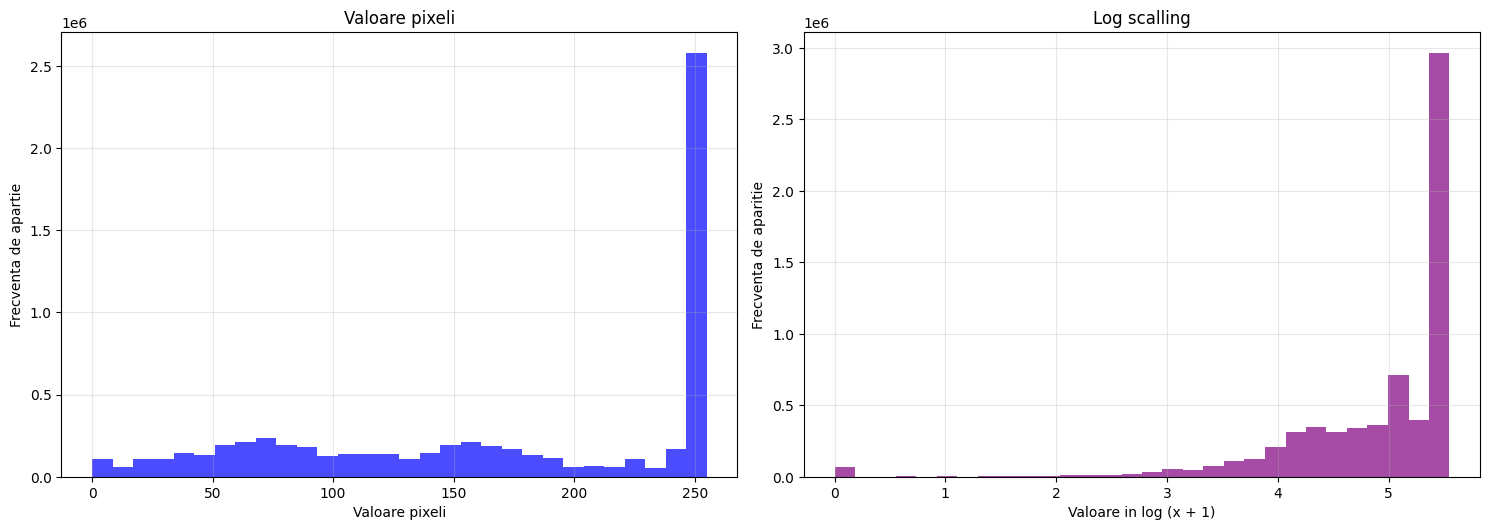

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

file_path = "data/images/"

imag = [i for i in os.listdir(file_path)]

def create_path():
    return [os.path.join(file_path, img) for img in imag]

lista_imag = create_path()

def normalizare_pixel(lst):
    all_pixel = []
    # transforma din rgb -> grayscale apoi intru vector numpy
    for img in lst:
        image = Image.open(img).convert('L')  
        pixel_values = np.array(image).flatten()  
        all_pixel.extend(pixel_values) 
    
    #din mai mute array obtinem un vector mare cu toate
    all_values = np.array(all_pixel)
    
    # folsim log(x + 1) sa evitam log de 0
    log_transform =[np.log1p(v) for v in all_values]
    
    
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    plt.hist(all_values, bins=30, color='blue', alpha=0.7)
    plt.title("Valoare pixeli")
    plt.xlabel("Valoare pixeli")
    plt.ylabel("Frecventa de apartie")
    plt.grid(True, alpha=0.3)
    
    plt.subplot(2, 2, 2)
    plt.hist(log_transform, bins=30, color='purple', alpha=0.7)
    plt.title("Log scalling")
    plt.xlabel("Valoare in log (x + 1)")
    plt.ylabel("Frecventa de aparitie")
    plt.grid(True, alpha=0.3)   
    plt.tight_layout()
    plt.show()
    
    
log_data = normalizare_pixel(lista_imag)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\claud\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\claud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\claud\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\claud\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


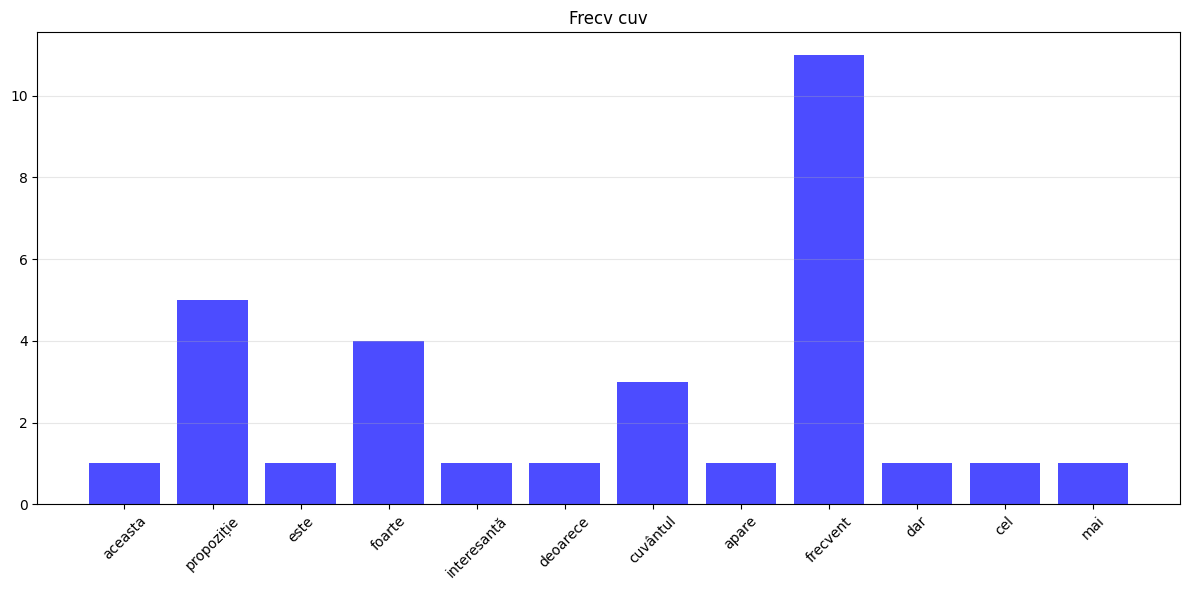

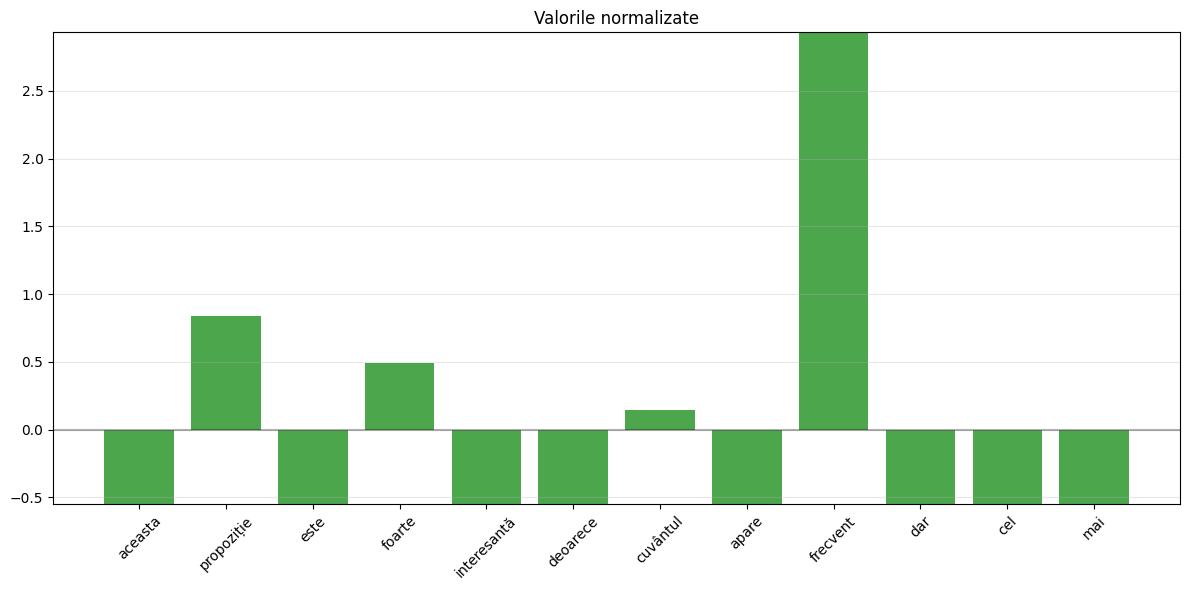

In [11]:
# problema 3 - numarul de aparitii a cuvintelor la nivelul unei propozitii.
from nltk.probability import FreqDist
import nltk

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# vedem pt feicare cuvant cat de des apare si aplicam o normalizare de tip standardizare(z - norm)
# ce e sub medie ca nr de ap va plota ca negativ ce nu va fi pozitiv
def propozitii(text):
    sentences = nltk.sent_tokenize(text)
    
    for idx, sentence in enumerate(sentences):
        sentence_words = [word.lower() for word in nltk.word_tokenize(sentence) if word.isalnum()]
        freq = FreqDist(sentence_words)  
        
        data = list(freq.values())
        
        medie = sum(data) / len(data)
        suma = (1 / len(data) * sum([(p - medie) ** 2 for p in data])) ** 0.5 
        if suma == 0:
            frecventa_znorm = [0] * len(data)
        else:
            frecventa_znorm = [(p - medie) / suma for p in data]
        
        plt.figure(figsize=(12, 6))
        words = list(freq.keys())
        plt.bar(words, data, color='blue', alpha=0.7)
        plt.title(f"Frecv cuv")
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.show()
        
        plt.figure(figsize=(12, 6))
        plt.bar(words, frecventa_znorm, color='green', alpha=0.7)
        plt.title(f"Valorile normalizate")
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3, axis='y')
        y_min = min(frecventa_znorm)
        y_max = max(frecventa_znorm)
        plt.ylim(y_min, y_max)  
        
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        
        plt.tight_layout()
        plt.show()

textP3  = """Aceasta propoziție propoziție propoziție propoziție propoziție este foarte foarte foarte foarte interesantă deoarece 
cuvântul cuvântul cuvântul apare frecvent, dar cel mai frecvent frecvent frecvent frecvent frecvent frecvent frecvent frecvent frecvent frecvent. """


propozitii(textP3)

